In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
# Prevent line breaks
pd.set_option('display.expand_frame_repr', False) 

In [10]:
# Load the Titanic dataset from a GitHub repository
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)


In [3]:
#few data insight and exploration check
print(titanic_data.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [5]:
# Check the shape of the dataset
print(titanic_data.shape)
# Check the data types of the columns
print(titanic_data.dtypes)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Summary statistics for numerical features
print(titanic_data.describe().transpose())


             count        mean         std   min       25%       50%    75%       max
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5  891.0000
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0    1.0000
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0    3.0000
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   80.0000
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0    8.0000
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0    6.0000
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0  512.3292


In [7]:
# Summary for categorical features
print(titanic_data.describe(include=['O']).transpose())

         count unique                  top freq
Name       891    891  Dooley, Mr. Patrick    1
Sex        891      2                 male  577
Ticket     891    681               347082    7
Cabin      204    147                   G6    4
Embarked   889      3                    S  644


In [8]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Dealing with misasing values 

In [9]:
#titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace = True)
#titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace = True)
#titanic_data["Fare"].fillna(titanic_data["Fare"].median(), inplace = True)

/tmp/ipykernel_28957/3959203740.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace = True)
/tmp/ipykernel_28957/3959203740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [11]:
# Fill missing Age values with the median
titanic_data.loc[titanic_data["Embarked"].isnull(), "Embarked" ] = titanic_data["Embarked"].mode()[0]
# Fill missing Embarked values with the mode
titanic_data.loc[titanic_data["Age"].isnull(), "Age"] = titanic_data.Age.median()
# Dropping the Cabin column since it has so much NA and doesnt affect the data quality
titanic_data.drop(columns=['Cabin'], inplace=True)

In [12]:
#checking the data now if it contains null again and checking the top dataset
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

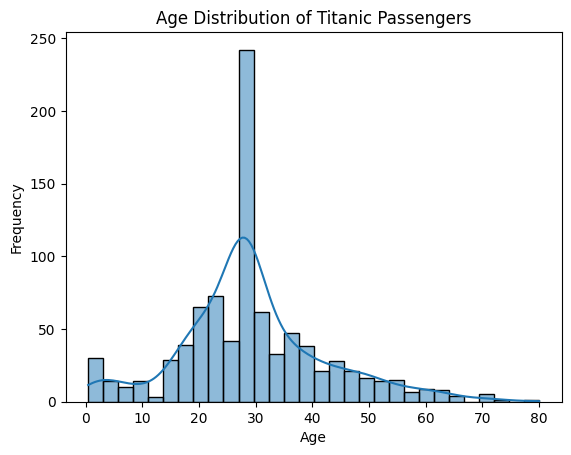

In [13]:
# Visualize the distribution of Age
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create age bins
titanic_data["Age_Group"] = pd.cut(titanic_data["Age"], bins = [0, 18, 35, 50, 65, 100],
                                   labels = ["Child", "Young Adult", "Adult", "Middle Age", 
                                            "Senior"])
# Plot the distribution of age groups
age_group_counts = titanic_data['Age_Group'].value_counts().sort_index()


In [ ]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Survival check


In [ ]:
titanic_data[titanic_data['Embarked'].isnull()].iloc[:10]

In [ ]:
titanic_data.columns

In [ ]:
titanic_data[titanic_data['Embarked'].isnull()].iloc[0,:3].transpose()

In [ ]:
titanic_data["Embarked"].mode()

In [ ]:
# Visualize survival rate by gender
sns.barplot(x="Sex", y="Survived", data = titanic_data)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender of passenger")
plt.show()

In [ ]:
survival_counts = titanic_data.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Create a stacked bar plot
survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))

# Add labels and title
plt.title("Survival Counts by Gender")
plt.ylabel("Count of Passengers")
plt.xlabel("Gender of Passenger")
plt.xticks(rotation=0)  # Optional: Rotate x-ticks if needed
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Survival ratw by family size

In [ ]:
titanic_data.columns

In [ ]:
# Create family size column
titanic_data["Family_Size"] = titanic_data["SibSp"] + titanic_data["Parch"] + 1
# Calculate survival rate by family size
Family_Survival = titanic_data[["Family_Size", "Survived"]].groupby("Family_Size").mean().reset_index()


In [ ]:
sns.barplot(x='Family_Size', y='Survived', data=Family_Survival)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

In [ ]:
# Count the number of passengers for each family size
FS_Counts = titanic_data['Family_Size'].value_counts().reset_index()
FS_Counts.columns = ['Family_Size', 'Count']  # Rename columns for clarity

In [ ]:
titanic_data.dtypes

In [ ]:
print(FS_Counts)

In [ ]:
# Create age bins
titanic_data['Age_Group'] = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 50, 65, 100], 
                                   labels=['Child', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])

# Get the counts of each age group and sort by index
age_group_counts = titanic_data['Age_Group'].value_counts().sort_index()

print(age_group_counts)

In [ ]:
import plotly.express as px



# Count the occurrences of each age group
age_group_counts = titanic_data['Age_Group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age_Group', 'Count']

# Create the bar plot using Plotly Express
fig = px.bar(age_group_counts, x='Age_Group', y='Count', 
             title='Distribution of Passengers by Age Group on the Titanic',
             labels={'Count': 'Number of Passengers'},
             color='Age_Group',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Customize the layout
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Passengers',
    bargap=0.2,
    showlegend=False
)

# Show the plot
fig.show()

In [ ]:
!pip install beautiful-plot

In [ ]:
sns.set_theme(style="darkgrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived', style='Sex', palette='deep')
plt.title('Age vs Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Create an interactive scatter plot
fig = px.scatter(
    titanic_data,
    x='Age',
    y='Fare',
    color='Survived',
    symbol='Sex',
    title='Age vs Fare with Survival Status',
    labels={'Age': 'Age', 'Fare': 'Fare'},
    hover_name='Name',  # Show passenger names on hover
    color_continuous_scale=px.colors.sequential.Viridis  # Color scale
)

fig.show()

In [ ]:
fig.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'notebook_connected' for better performance

In [ ]:
# Create an interactive scatter plot
fig = px.scatter(
    titanic_data,
    x='Age',
    y='Fare',
    color='Survived',
    symbol='Sex',
    title='Age vs Fare with Survival Status',
    labels={'Age': 'Age', 'Fare': 'Fare'},
    hover_name='Name',  # Show passenger names on hover
    color_continuous_scale=px.colors.sequential.Viridis  # Color scale
)

# Show the plot
fig.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Step 3: Set the default renderer for Jupyter Notebook
pio.renderers.default = 'notebook_connected'

# Step 4: Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Step 5: Create an interactive scatter plot
fig = px.scatter(
    titanic_data,
    x='Age',
    y='Fare',
    color='Survived',
    symbol='Sex',
    title='Age vs Fare with Survival Status',
    labels={'Age': 'Age', 'Fare': 'Fare'},
    hover_name='Name',  # Show passenger names on hover
    color_continuous_scale=px.colors.sequential.Viridis  # Color scale
)

# Step 6: Show the plot
fig.show()



In [ ]:
titanic_data.head(2)

In [ ]:
import plotly
print(plotly.__version__)